# **Import Libraries and modules**

**Model 1:**

*   Number of Parameters : 1533
*   Accuracy : 97.46%

**Model 2:**

*   Number of Parameters : 4370
*   Accuracy : 98.50%

**Model 3:**

*   Number of Parameters : 2834
*   Accuracy : 98.60%

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


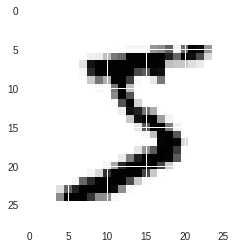

In [104]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [107]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [109]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [110]:
## MODEL - 1

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(12, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(3, 3, 3, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 13, 13, 12)        396       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 12)          0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 3)           327       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 1, 1, 10)          490       
_________________________________________________________________
flatten_15 (Flatten)         (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [113]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.4038 - acc: 0.8767
Epoch 2/10
10656/60000 [====>.........................] - ETA: 37s - loss: 0.1759 - acc: 0.9458

60000/60000 [==============================] - 46s 770us/step - loss: 0.1585 - acc: 0.9516
Epoch 3/10
18048/60000 [========>.....................] - ETA: 40s - loss: 0.1318 - acc: 0.9596

60000/60000 [==============================] - 53s 876us/step - loss: 0.1334 - acc: 0.9591
Epoch 4/10
22880/60000 [==========>...................] - ETA: 28s - loss: 0.1212 - acc: 0.9625

60000/60000 [==============================] - 46s 770us/step - loss: 0.1194 - acc: 0.9634
Epoch 5/10
25248/60000 [===========>..................] - ETA: 27s - loss: 0.1091 - acc: 0.9670

60000/60000 [==============================] - 46s 762us/step - loss: 0.1105 - acc: 0.9662
Epoch 6/10
27200/60000 [============>.................] - ETA: 24s - loss: 0.1019 - acc: 0.9689

60000/60000 [==============================] - 45s 757us/step - loss: 0.1026 - acc: 0.9685
Epoch 7/10
28736/60000 [=============>................] - ETA: 23s - loss: 0.0975 - acc: 0.9698

60000/60000 [==============================] - 45s 743us/step - loss: 0.0977 - acc: 0.9696
Epoch 8/10
29216/60000 [=============>................] - ETA: 23s - loss: 0.0956 - acc: 0.9706

60000/60000 [==============================] - 45s 745us/step - loss: 0.0925 - acc: 0.9717
Epoch 9/10
29248/60000 [=============>................] - ETA: 23s - loss: 0.0877 - acc: 0.9729

60000/60000 [==============================] - 46s 771us/step - loss: 0.0889 - acc: 0.9718
Epoch 10/10
28096/60000 [=============>................] - ETA: 24s - loss: 0.0853 - acc: 0.9726

60000/60000 [==============================] - 47s 787us/step - loss: 0.0844 - acc: 0.9733


In [114]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.07810063503249548, 0.9746]


In [115]:
## MODEL - 2

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 6, 6))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 13, 13, 10)        330       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 10)          0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 6, 6, 10)          110       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 1, 1, 10)          3610      
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`
  # Remove the CWD from sys.path while we load stuff.


In [116]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 49s 823us/step - loss: 0.3538 - acc: 0.8928
Epoch 2/10
 9120/60000 [===>..........................] - ETA: 41s - loss: 0.1301 - acc: 0.9604

60000/60000 [==============================] - 49s 824us/step - loss: 0.1172 - acc: 0.9643
Epoch 3/10
17664/60000 [=======>......................] - ETA: 32s - loss: 0.0948 - acc: 0.9715

60000/60000 [==============================] - 48s 792us/step - loss: 0.0940 - acc: 0.9713
Epoch 4/10
18752/60000 [========>.....................] - ETA: 42s - loss: 0.0834 - acc: 0.9755

60000/60000 [==============================] - 54s 902us/step - loss: 0.0785 - acc: 0.9755
Epoch 5/10
22816/60000 [==========>...................] - ETA: 28s - loss: 0.0712 - acc: 0.9787

60000/60000 [==============================] - 47s 779us/step - loss: 0.0683 - acc: 0.9790
Epoch 6/10
25056/60000 [===========>..................] - ETA: 26s - loss: 0.0610 - acc: 0.9812

60000/60000 [==============================] - 47s 780us/step - loss: 0.0615 - acc: 0.9811
Epoch 7/10
25280/60000 [===========>..................] - ETA: 26s - loss: 0.0558 - acc: 0.9830

60000/60000 [==============================] - 46s 773us/step - loss: 0.0550 - acc: 0.9835
Epoch 8/10
26944/60000 [============>.................] - ETA: 25s - loss: 0.0482 - acc: 0.9852

60000/60000 [==============================] - 46s 768us/step - loss: 0.0511 - acc: 0.9838
Epoch 9/10
27232/60000 [============>.................] - ETA: 25s - loss: 0.0474 - acc: 0.9854

60000/60000 [==============================] - 46s 764us/step - loss: 0.0479 - acc: 0.9853
Epoch 10/10
28224/60000 [=============>................] - ETA: 23s - loss: 0.0434 - acc: 0.9869

60000/60000 [==============================] - 45s 753us/step - loss: 0.0450 - acc: 0.9863


In [117]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

[0.04824011834450066, 0.985]


In [118]:
## MODEL - 3

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(12, 7, 7, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 22, 22, 12)        600       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 11, 11, 12)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 9, 9, 8)           872       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 4, 4, 8)           72        
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 1, 1, 10)          1290      
_________________________________________________________________
flatten_17 (Flatten)         (None, 10)                0         
__________

In [120]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
			 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)


/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.3380 - acc: 0.8933
Epoch 2/10
11136/60000 [====>.........................] - ETA: 37s - loss: 0.1328 - acc: 0.9587

60000/60000 [==============================] - 46s 765us/step - loss: 0.1205 - acc: 0.9628
Epoch 3/10
21952/60000 [=========>....................] - ETA: 28s - loss: 0.0990 - acc: 0.9701

60000/60000 [==============================] - 45s 756us/step - loss: 0.0961 - acc: 0.9707
Epoch 4/10
25408/60000 [===========>..................] - ETA: 26s - loss: 0.0837 - acc: 0.9749

60000/60000 [==============================] - 48s 801us/step - loss: 0.0803 - acc: 0.9751
Epoch 5/10
23616/60000 [==========>...................] - ETA: 34s - loss: 0.0715 - acc: 0.9782

60000/60000 [==============================] - 50s 834us/step - loss: 0.0716 - acc: 0.9785
Epoch 6/10
27328/60000 [============>.................] - ETA: 24s - loss: 0.0676 - acc: 0.9795

60000/60000 [==============================] - 45s 758us/step - loss: 0.0651 - acc: 0.9800
Epoch 7/10
27744/60000 [============>.................] - ETA: 24s - loss: 0.0591 - acc: 0.9827

60000/60000 [==============================] - 46s 761us/step - loss: 0.0596 - acc: 0.9818
Epoch 8/10
28736/60000 [=============>................] - ETA: 23s - loss: 0.0555 - acc: 0.9829

60000/60000 [==============================] - 45s 750us/step - loss: 0.0542 - acc: 0.9828
Epoch 9/10
29216/60000 [=============>................] - ETA: 23s - loss: 0.0502 - acc: 0.9838

60000/60000 [==============================] - 46s 766us/step - loss: 0.0520 - acc: 0.9837
Epoch 10/10
29152/60000 [=============>................] - ETA: 23s - loss: 0.0470 - acc: 0.9851

60000/60000 [==============================] - 45s 754us/step - loss: 0.0482 - acc: 0.9844


In [121]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

[0.0454571135582868, 0.986]


In [0]:
y_pred = model.predict(X_test)

In [123]:
print(y_pred[:9])
print(y_test[:9])

[[6.7217396e-09 6.6142186e-10 2.6989592e-06 2.6600392e-06 1.7450931e-12
  2.2511902e-10 8.8664944e-15 9.9999416e-01 4.9007221e-10 4.4558846e-07]
 [8.9205855e-07 7.7509525e-05 9.9992096e-01 7.0243265e-09 5.1566078e-15
  5.3475546e-10 6.5473921e-07 7.8661140e-11 4.7113424e-09 1.2660219e-14]
 [2.2484569e-06 9.9912578e-01 3.1849850e-05 4.7999686e-07 2.5234607e-04
  3.1005296e-05 1.5006721e-06 4.4124413e-04 1.0551663e-04 8.0837581e-06]
 [9.9995279e-01 1.5534109e-11 2.9693510e-07 3.3153896e-10 1.8961329e-08
  9.6050838e-09 3.2832322e-05 5.1336171e-09 1.0172252e-08 1.4089030e-05]
 [1.2919771e-10 5.7092842e-10 3.3798029e-09 7.9152024e-08 9.9980444e-01
  1.1669375e-09 9.7716626e-11 1.1321575e-06 7.7688442e-09 1.9444065e-04]
 [1.3011175e-06 9.9960834e-01 7.4265267e-06 3.3647414e-08 7.0267532e-05
  3.6151018e-06 7.6274567e-08 2.8771546e-04 8.8134511e-06 1.2441528e-05]
 [2.1225938e-13 3.8276404e-08 5.3499313e-08 3.4530885e-08 9.9997711e-01
  2.3478526e-06 8.2278905e-13 2.5572260e-07 1.4533970e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [125]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored